In [226]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [227]:
# fig, ax = plt.subplots(figsize=(8, 14))

# 밑창 외곽선을 그리기 위한 좌표 설정 - right
sole_outline = patches.Rectangle((0, 0), width=195, height=537, fill=False, edgecolor='black', lw=2)

# 격자를 그리기 위한 사각형들 추가 (사각형 좌표 및 크기 설정)
x_ls = [[87, 134], [87, 134], [69, 109, 146], [27, 69, 107, 147], [27, 69, 116]]
y_ls = [[56, 56], [154, 154], [259, 259, 259], [367, 356, 356, 356], [454, 454, 435]]
sensor_size = 20
foot_w = 196
foot_h = 537 # width, height
plantar_r = []

In [228]:
# serial 통신하면 나중에 들어올 값임. 지금은 임의의 값 부여
z_values = [
    50, 63,        # 첫 번째 리스트 (2개)
    70, 80,        # 두 번째 리스트 (2개)
    65, 75, 85,    # 세 번째 리스트 (3개)
    60, 70, 80, 90,  # 네 번째 리스트 (4개)
    55, 65, 75     # 다섯 번째 리스트 (3개)
]

In [229]:
# 좌표 각 요소에 10을 더한 새로운 좌표 리스트 생성
x_ls_offset = [[x + 10 for x in row] for row in x_ls]
y_ls_offset = [[y + 10 for y in row] for row in y_ls]

# x_ls_offset과 y_ls_offset을 1D 리스트로 변환
x_coords = [x for row in x_ls_offset for x in row]
y_coords = [y for row in y_ls_offset for y in row]


In [230]:
# x, y 좌표 격자 생성
x_l = 0
x_r = 195  # left, right
y_b = 0
y_u = 537  # bottom, upper
x_size = 1000
y_size = 3000

# 각 좌표에 대해 사각형 패치를 추가
for i in range(len(x_ls)):  # x_ls의 길이만큼 반복
    for j in range(len(x_ls[i])):  # 각 줄의 x 좌표에 맞는 y 좌표들에 대해 반복
        plantar_r.append(patches.Rectangle((x_ls[i][j], y_ls[i][j]), sensor_size, sensor_size, edgecolor='black', fill=False, alpha=0.6))

# # 새로운 플롯 설정
# fig, ax = plt.subplots(figsize=(8, 14))  # 플롯 크기 조정 (가로, 세로)


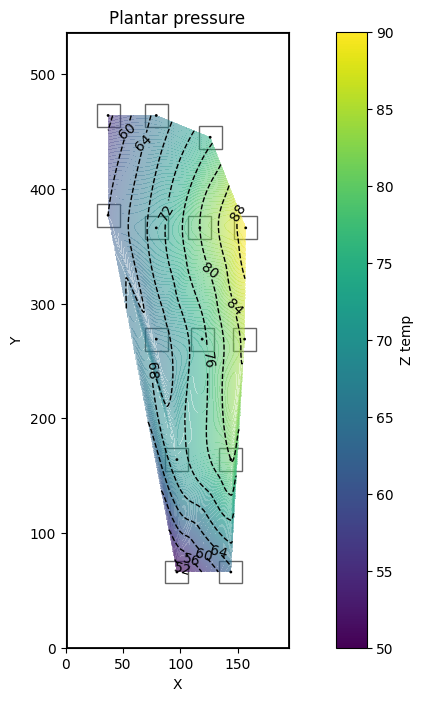

In [231]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot()

# 도형을 플롯에 추가
ax.add_patch(sole_outline)
for r in plantar_r:
    ax.add_patch(r)

# 축 크기와 비율 설정
ax.set_xlim(0, 195)
ax.set_ylim(0, 537)
ax.set_aspect('equal')


# 산점도로 x, y 좌표 위에 z_value를 색상으로 표현
scatter = ax.scatter(x_coords, y_coords, c=z_values, cmap='viridis', edgecolor='k', s=1, zorder=5)

# 등고선
x_grid = np.linspace(x_l, x_r, x_size)
y_grid = np.linspace(y_b, y_u, y_size)
X, Y = np.meshgrid(x_grid, y_grid)

# griddata를 사용하여 x, y 좌표에 대해 z 값을 보간
Z = griddata((x_coords, y_coords), z_values, (X, Y), method='cubic')
contour1 = ax.contour(X, Y, Z, levels=10, colors='k', linewidths=1, linestyles='--') ## 등고선
contour2 = ax.contourf(X, Y, Z, levels=256, cmap='viridis', alpha=0.3)
ax.clabel(contour1, contour1.levels, inline=True) ## contour 라벨
 
# 컬러바 추가
cbar = fig.colorbar(scatter, ax=ax)
cbar.set_label('Z temp')

# 축 크기와 비율 설정
ax.set_xlim(0, 195)  # 오프셋을 고려하여 확대
ax.set_ylim(0, 537)
ax.set_aspect('equal')

# 제목 및 축 레이블 추가
ax.set_title('Plantar pressure')
ax.set_xlabel('X')
ax.set_ylabel('Y')

plt.show()